In [782]:
!pip install colorama

In [783]:
# Import the main libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Data preprocessing

#### This exercise provide us with a train, test and sample dataset. Have in mind that if we have to apply different data manipulation, it has to be in all the datasets

In [785]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

#### From the information of the dataset, we can see that there is composed by several numerical columns and object columns. We will have to take care of the object columns if we want to feed the dataset to a machine learning algorithm. Let's take a look at the dataframe and perform some basic statistical analysis:

In [787]:
df_train.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [788]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,800.0,400.500000,231.084400,1.000000,200.750000,400.500000,600.250000,800.000000
A1_Score,800.0,0.560000,0.496697,0.000000,0.000000,1.000000,1.000000,1.000000
A2_Score,800.0,0.530000,0.499411,0.000000,0.000000,1.000000,1.000000,1.000000
A3_Score,800.0,0.450000,0.497805,0.000000,0.000000,0.000000,1.000000,1.000000
A4_Score,800.0,0.415000,0.493030,0.000000,0.000000,0.000000,1.000000,1.000000
A5_Score,800.0,0.395000,0.489157,0.000000,0.000000,0.000000,1.000000,1.000000
A6_Score,800.0,0.303750,0.460164,0.000000,0.000000,0.000000,1.000000,1.000000
A7_Score,800.0,0.397500,0.489687,0.000000,0.000000,0.000000,1.000000,1.000000
A8_Score,800.0,0.508750,0.500236,0.000000,0.000000,1.000000,1.000000,1.000000
A9_Score,800.0,0.495000,0.500288,0.000000,0.000000,0.000000,1.000000,1.000000


#### We can observe that we only have two numerical (non-binary) columns: age and result

#### We can see that some of the object type columns have a binary character, whilst others present non-binary components, so we will have to take care of it later. But first, let's check if there are null values:

In [790]:
df_train.isnull().sum()

ID                 0
A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jaundice           0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

#### Even though we have no null values, some of the data is labelled as '?' in the ethnicity column, meaning that the information in the column is missing. This type of information is not useful for the algorithm. We can have a deeper look into this column:

In [792]:
df_train['ethnicity'].value_counts()

ethnicity
White-European     257
?                  203
Middle Eastern      97
Asian               67
Black               47
South Asian         34
Pasifika            32
Others              29
Latino              17
Hispanic             9
Turkish              5
others               3
Name: count, dtype: int64

#### Now we can clearly observe that there are some problems in this column that we will have to address. For example, two columns meaning the same with slightly different names (Others/others) besides from the '?' column. Let's have a look at the rest of categorical data columns:

In [794]:
df_train['relation'].value_counts()

relation
Self                        709
?                            40
Parent                       29
Relative                     18
Others                        2
Health care professional      2
Name: count, dtype: int64

#### In this column, we have again the '?' value, adding confusion to the dataset and difficulting its analysis.

In [796]:
df_train['gender'].value_counts()

gender
m    530
f    270
Name: count, dtype: int64

#### The gender column only presents binary-type data

In [798]:
df_train['jaundice'].value_counts()

jaundice
no     615
yes    185
Name: count, dtype: int64

In [799]:
df_train['austim'].value_counts

<bound method IndexOpsMixin.value_counts of 0       no
1       no
2      yes
3       no
4       no
      ... 
795     no
796     no
797     no
798     no
799     no
Name: austim, Length: 800, dtype: object>

In [800]:
df_train['contry_of_res'].value_counts

<bound method IndexOpsMixin.value_counts of 0                   Austria
1                     India
2             United States
3             United States
4              South Africa
               ...         
795             New Zealand
796                  Cyprus
797             New Zealand
798                  Canada
799    United Arab Emirates
Name: contry_of_res, Length: 800, dtype: object>

In [801]:
df_train['used_app_before'].value_counts

<bound method IndexOpsMixin.value_counts of 0       no
1       no
2       no
3       no
4       no
      ... 
795     no
796     no
797     no
798     no
799    yes
Name: used_app_before, Length: 800, dtype: object>

In [802]:
df_train['age_desc'].value_counts

<bound method IndexOpsMixin.value_counts of 0      18 and more
1      18 and more
2      18 and more
3      18 and more
4      18 and more
          ...     
795    18 and more
796    18 and more
797    18 and more
798    18 and more
799    18 and more
Name: age_desc, Length: 800, dtype: object>

#### This column only contains the same value, so we can drop it

In [804]:
df_train.drop('age_desc', axis = 1, inplace = True)
df_test.drop('age_desc', axis = 1, inplace = True)

In [805]:
df_train['relation'].value_counts

<bound method IndexOpsMixin.value_counts of 0      Self
1      Self
2      Self
3      Self
4      Self
       ... 
795    Self
796    Self
797    Self
798    Self
799    Self
Name: relation, Length: 800, dtype: object>

#### From this first data exploration, we can conclude that the rest of object-type data columns do not present any problem (besides from encoding) that we have to address. Let's take care of the problematic values in the two first columns:

In [807]:
df_train = df_train.replace({
    'yes': 1,
    'no': 0,
    '?': 'Others',
    'others': 'Others'
})

df_test = df_test.replace({
    'yes': 1,
    'no': 0,
    '?': 'Others',
    'others': 'Others'
})

#### We can see that the columns now have a much better look:

In [809]:
df_train['ethnicity'].value_counts()

ethnicity
White-European     257
Others             235
Middle Eastern      97
Asian               67
Black               47
South Asian         34
Pasifika            32
Latino              17
Hispanic             9
Turkish              5
Name: count, dtype: int64

In [810]:
df_train['relation'].value_counts()

relation
Self                        709
Others                       42
Parent                       29
Relative                     18
Health care professional      2
Name: count, dtype: int64

## Exploratory Data Analysis

#### Let's explore the two numerical (non-binary) columns and their relation with the target column

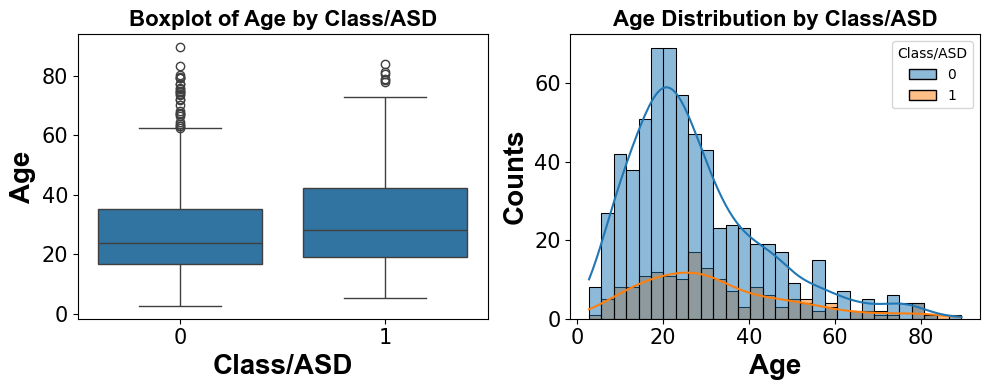

In [813]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))  # 1 row, 2 columns
csfont = {'fontname': 'Arial'}

# Subplot 1: Boxplot
sns.boxplot(x=df_train['Class/ASD'], y=df_train['age'], ax=axes[0])
axes[0].tick_params(axis='both', which='major', labelsize=15)
axes[0].set_xlabel('Class/ASD', fontsize=20, fontweight='bold', **csfont)
axes[0].set_ylabel('Age', fontsize=20, fontweight='bold', **csfont)
axes[0].set_title('Boxplot of Age by Class/ASD', fontsize=16, fontweight='bold', **csfont)

# Subplot 2: Histogram
sns.histplot(x=df_train['age'], hue=df_train['Class/ASD'], kde=True, bins=30, ax=axes[1])
axes[1].tick_params(axis='both', which='major', labelsize=15)
axes[1].set_xlabel('Age', fontsize=20, fontweight='bold', **csfont)
axes[1].set_ylabel('Counts', fontsize=20, fontweight='bold', **csfont)
axes[1].set_title('Age Distribution by Class/ASD', fontsize=16, fontweight='bold', **csfont)

plt.tight_layout()

#### From these plots, we can observe that the mean age of people having autism is slightly higher than the one of people who don't have it.

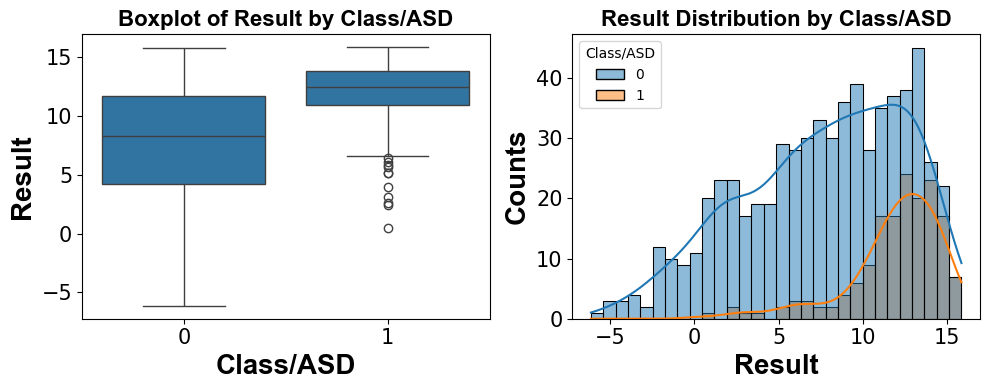

In [815]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))  # 1 row, 2 columns
csfont = {'fontname': 'Arial'}

# Subplot 1: Boxplot
sns.boxplot(x=df_train['Class/ASD'], y=df_train['result'], ax=axes[0])
axes[0].tick_params(axis='both', which='major', labelsize=15)
axes[0].set_xlabel('Class/ASD', fontsize=20, fontweight='bold', **csfont)
axes[0].set_ylabel('Result', fontsize=20, fontweight='bold', **csfont)
axes[0].set_title('Boxplot of Result by Class/ASD', fontsize=16, fontweight='bold', **csfont)

# Subplot 2: Histogram
sns.histplot(x=df_train['result'], hue=df_train['Class/ASD'], kde=True, bins=30, ax=axes[1])
axes[1].tick_params(axis='both', which='major', labelsize=15)
axes[1].set_xlabel('Result', fontsize=20, fontweight='bold', **csfont)
axes[1].set_ylabel('Counts', fontsize=20, fontweight='bold', **csfont)
axes[1].set_title('Result Distribution by Class/ASD', fontsize=16, fontweight='bold', **csfont)

plt.tight_layout()

#### From the boxplot we can see that the median from the people who have autism is higher than the ones who do not have it. Moreover, the range of data for the people with autism is much narrower. This is also confirmed in the histogram, where people having autism present a range of results narrower than the ones who do not have autism.

#### Now let's perform a Chi-square test to see if there are significant associations between the target column and the different columns in the dataset

In [817]:
target_col = 'Class/ASD'   # Define the target column
features = [col for col in df_train.columns if col != target_col]

# Function to perform chi-square test
def chi_square_test(data, target):
    results = {}  # Store results
    for col in data.columns:
        if col != target:
            # Create contingency table
            contingency_table = pd.crosstab(data[col], data[target])
            
            # Perform chi-square test
            chi2, p, dof, expected = chi2_contingency(contingency_table)
            
            # Store results
            results[col] = {'chi2': chi2, 'p-value': p}
    
    return results  # Make sure to return the dictionary

# Run the Chi-Square Test
from scipy.stats import chi2_contingency
chi_square_results = chi_square_test(df_train, target_col)

from colorama import Fore, Style
# Print Results
print("Chi-Square Test Results: \n")
print("===" * 22)

for feature, result in chi_square_results.items():
    chi2_value = result['chi2']
    p_value = result['p-value']

    # Check if Chi2 is positive or negative and set color
    if p_value < 0.05:
        color = Fore.GREEN
    else:
        color = Fore.RED

    # Print the result with color
    print(color + f"{feature}: Chi2 = {chi2_value:.4f}, p-value = {p_value:.4f}")
    if p_value < 0.05:
        print(f"   {feature} is significantly associated with the target column.")
    else:
        print(f"   {feature} is NOT significantly associated with the target column.")

    # Reset color and print separator
    print(Style.RESET_ALL + "===" * 22)

Chi-Square Test Results: 

ID: Chi2 = 800.0000, p-value = 0.4834
   ID is NOT significantly associated with the target column.
A1_Score: Chi2 = 70.7260, p-value = 0.0000
   A1_Score is significantly associated with the target column.
A2_Score: Chi2 = 109.2931, p-value = 0.0000
   A2_Score is significantly associated with the target column.
A3_Score: Chi2 = 167.6596, p-value = 0.0000
   A3_Score is significantly associated with the target column.
A4_Score: Chi2 = 198.3093, p-value = 0.0000
   A4_Score is significantly associated with the target column.
A5_Score: Chi2 = 168.2399, p-value = 0.0000
   A5_Score is significantly associated with the target column.
A6_Score: Chi2 = 232.9523, p-value = 0.0000
   A6_Score is significantly associated with the target column.
A7_Score: Chi2 = 161.3906, p-value = 0.0000
   A7_Score is significantly associated with the target column.
A8_Score: Chi2 = 76.5185, p-value = 0.0000
   A8_Score is significantly associated with the target column.
A9_Score: C

#### We can see that ID, age, gender, used_app_before and result do not present a positive chi-square test. But we cannot drop all the data. For example, we have just studied that age and result are dependent with the target, even though they do not fit the chi-square test criteria, we are going to keep them.

#### On the other hand, the ID column does not provide any useful information, and used_app_before does not seem to have a logical relation with the target column. Finally, since the gender does not fit the chi-square test, we are also going to drop this column.

In [819]:
df_train.drop(['ID', 'gender', 'used_app_before'], axis = 1, inplace = True)
df_test.drop(['ID', 'gender', 'used_app_before'], axis = 1, inplace = True)

In [820]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   A1_Score       800 non-null    int64  
 1   A2_Score       800 non-null    int64  
 2   A3_Score       800 non-null    int64  
 3   A4_Score       800 non-null    int64  
 4   A5_Score       800 non-null    int64  
 5   A6_Score       800 non-null    int64  
 6   A7_Score       800 non-null    int64  
 7   A8_Score       800 non-null    int64  
 8   A9_Score       800 non-null    int64  
 9   A10_Score      800 non-null    int64  
 10  age            800 non-null    float64
 11  ethnicity      800 non-null    object 
 12  jaundice       800 non-null    int64  
 13  austim         800 non-null    int64  
 14  contry_of_res  800 non-null    object 
 15  result         800 non-null    float64
 16  relation       800 non-null    object 
 17  Class/ASD      800 non-null    int64  
dtypes: float64

In [821]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   A1_Score       200 non-null    int64  
 1   A2_Score       200 non-null    int64  
 2   A3_Score       200 non-null    int64  
 3   A4_Score       200 non-null    int64  
 4   A5_Score       200 non-null    int64  
 5   A6_Score       200 non-null    int64  
 6   A7_Score       200 non-null    int64  
 7   A8_Score       200 non-null    int64  
 8   A9_Score       200 non-null    int64  
 9   A10_Score      200 non-null    int64  
 10  age            200 non-null    float64
 11  ethnicity      200 non-null    object 
 12  jaundice       200 non-null    int64  
 13  austim         200 non-null    int64  
 14  contry_of_res  200 non-null    object 
 15  result         200 non-null    float64
 16  relation       200 non-null    object 
dtypes: float64(2), int64(12), object(3)
memory usage: 26.7

## Train/test split and data imbalance

#### Finally, we have to check if there is some data imbalance in the dataset

In [823]:
diseases = df_train['Class/ASD'].value_counts() # Naming the different diseases and counting how many times they appear in the column

dis_data = pd.DataFrame({'Class/ASD': diseases.index,
                         'Counts': diseases.values}) # Store the information of the diseases into a DataFrame for a clearer view
print(dis_data) 

   Class/ASD  Counts
0          0     639
1          1     161


Text(0.5, 0, 'Counts')

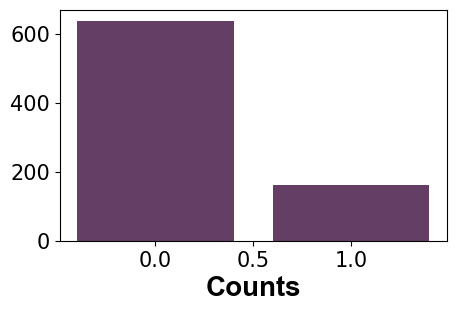

In [824]:
# Plotting the values in a bar plot for clearer understanding
plt.figure(figsize=(5,3))
plt.bar(dis_data['Class/ASD'], dis_data['Counts'], color = '#653e66')
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Class/ASD', fontsize = 20, fontweight='bold', **csfont)
plt.xlabel('Counts', fontsize = 20, fontweight='bold', **csfont)

#### It is clear that there is a huge imbalance in the data, which may led to the ML model to mistake some predictions, so let's solve this problem:

#### We need to encode the object-type columns:

#### - ethnicity
#### - contry_of_res
#### - relation

#### we will use LabelEncoder to transform this data:

In [827]:
from sklearn.preprocessing import LabelEncoder

def encode_labels(data):
    for col in data.columns:
      
      # Here we will check if datatype
      # is object then we will encode it
      if data[col].dtype == 'object':
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
    
    return data

df_train = encode_labels(df_train)
df_test = encode_labels(df_test)

In [828]:
X = df_train.iloc[:, :-1].values
y = df_train.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 19)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [829]:
from imblearn.over_sampling import RandomOverSampler
ROS = RandomOverSampler(random_state = 19)
X_train, y_train = ROS.fit_resample(X_train, y_train)

#### Now we can check if the data is balanced

In [831]:
target = pd.Series(y_train).value_counts() # Naming the different diseases and counting how many times they appear in the column

dis_data = pd.DataFrame({'Class/ASD': target.index,
                         'Counts': target.values}) # Store the information of the diseases into a DataFrame for a clearer view
print(dis_data) 

   Class/ASD  Counts
0          0     507
1          1     507


Text(0.5, 0, 'Counts')

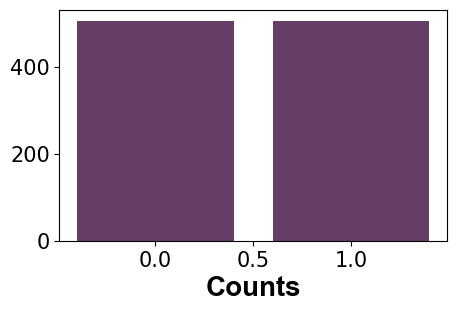

In [832]:
plt.figure(figsize=(5,3))
plt.bar(dis_data['Class/ASD'], dis_data['Counts'], color = '#653e66')
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Class/ASD', fontsize = 20, fontweight='bold', **csfont)
plt.xlabel('Counts', fontsize = 20, fontweight='bold', **csfont)

#### Now the data is balanced, the columns are encoded and normalised, so the data is ready to train the model

## Model training

#### We can try to apply different classification algorithms such as Logistic Regression, K-Nearest Neighbors, Support Vector Machine, Naive Bayes, Decision Tree, Random Forest or XGBoost and an articifial neural network

## Logistic Regresion

In [836]:
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression()
classifier_lr.fit(X_train, y_train)

LogisticRegression()

Accuracy Score (Logistic Regression model): 80.625 %


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

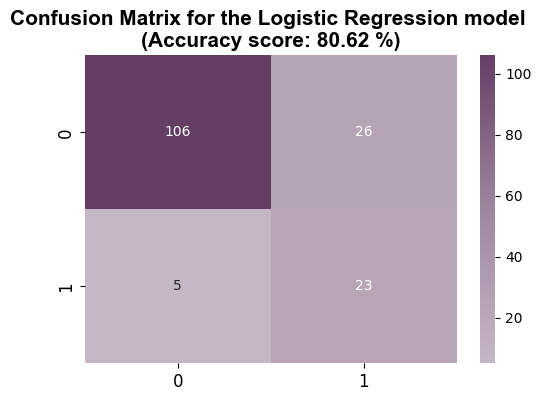

In [863]:
lr_ypred = classifier_lr.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix

print("Accuracy Score (Logistic Regression model):", accuracy_score(y_test, lr_ypred)*100, "%") # Print the accuracy score for the predictions

cm_lr = confusion_matrix(y_test, lr_ypred)  # Generate the confusion matrix

from matplotlib.colors import LinearSegmentedColormap
colors = ["#c5b7c6", "#9f869f", "#653e66"]  # Light purple to dark purple
custom_cmap = LinearSegmentedColormap.from_list("purple_custom", colors) # Custom map for the confusion matrix

plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot = True, fmt='d', cmap = custom_cmap)   # Plot the confusion matrix into a heatmap
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title(f'Confusion Matrix for the Logistic Regression model \n(Accuracy score: {accuracy_score(y_test, lr_ypred)*100:.2f} %)', fontsize = 15, fontweight='bold', **csfont)
plt.tight_layout

## K-Nearest Neighbors

In [838]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

classifier_kn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2) # Initialise a standard KNN classifier

param_grid = {'n_neighbors': range(1,21)}  # Define the range of neighbors to test
grid_search = GridSearchCV(estimator = classifier_kn, param_grid = param_grid, cv = 5, scoring = 'accuracy')
grid_search.fit(X_train, y_train)
optimal_neighbors = grid_search.best_params_['n_neighbors']  # extract the optimal number of neighbors
best_score = grid_search.best_score_
print(f"Optimal number of neighbors: {optimal_neighbors}")
print(f"Best cross-validation accuracy: {best_score}")

classifier_kn = KNeighborsClassifier(n_neighbors = optimal_neighbors, metric = 'minkowski', p = 2) # Redo the KNN clasiffier with optimal neighbors
classifier_kn.fit(X_train, y_train)

Optimal number of neighbors: 1
Best cross-validation accuracy: 0.9181631956299079


KNeighborsClassifier(n_neighbors=1)

Accuracy Score (K-Nearest Neighbors model): 80.0 %


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

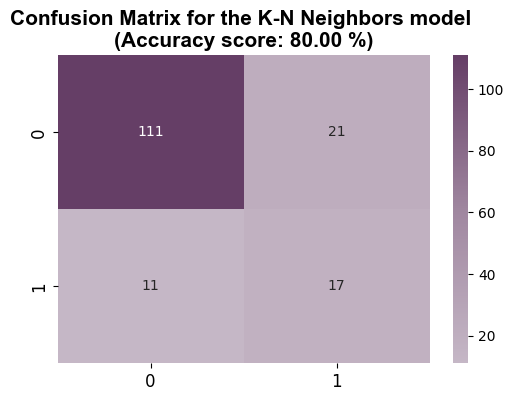

In [839]:
kn_ypred = classifier_kn.predict(X_test)

print("Accuracy Score (K-Nearest Neighbors model):", accuracy_score(y_test, kn_ypred)*100, "%") # Print the accuracy score for the predictions

cm_kn = confusion_matrix(y_test, kn_ypred)  # Generate the confusion matrix

from matplotlib.colors import LinearSegmentedColormap
colors = ["#c5b7c6", "#9f869f", "#653e66"]  # Light purple to dark purple
custom_cmap = LinearSegmentedColormap.from_list("purple_custom", colors) # Custom map for the confusion matrix

plt.figure(figsize=(6, 4))
sns.heatmap(cm_kn, annot = True, fmt='d', cmap = custom_cmap)   # Plot the confusion matrix into a heatmap
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title(f'Confusion Matrix for the K-N Neighbors model \n(Accuracy score: {accuracy_score(y_test, kn_ypred)*100:.2f} %)', fontsize = 15, fontweight='bold', **csfont)
plt.tight_layout

## Support Vector Machine

In [841]:
from sklearn.svm import SVC
classifier_svc = SVC(kernel = 'linear', random_state = 19)
classifier_svc.fit(X_train, y_train)

SVC(kernel='linear', random_state=19)

Accuracy Score (Support Vector Machine model): 76.875 %


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

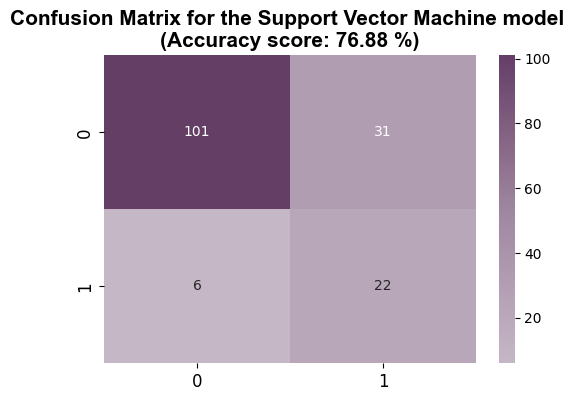

In [842]:
svc_ypred = classifier_svc.predict(X_test)

print("Accuracy Score (Support Vector Machine model):", accuracy_score(y_test, svc_ypred)*100, "%") # Print the accuracy score for the predictions

cm_svc = confusion_matrix(y_test, svc_ypred)  # Generate the confusion matrix

from matplotlib.colors import LinearSegmentedColormap
colors = ["#c5b7c6", "#9f869f", "#653e66"]  # Light purple to dark purple
custom_cmap = LinearSegmentedColormap.from_list("purple_custom", colors) # Custom map for the confusion matrix

plt.figure(figsize=(6, 4))
sns.heatmap(cm_svc, annot = True, fmt='d', cmap = custom_cmap)   # Plot the confusion matrix into a heatmap
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title(f'Confusion Matrix for the Support Vector Machine model \n(Accuracy score: {accuracy_score(y_test, svc_ypred)*100:.2f} %)', fontsize = 15, fontweight='bold', **csfont)
plt.tight_layout

## Naive Bayes

In [844]:
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train)

GaussianNB()

Accuracy Score (Naive Bayes model): 81.25 %


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

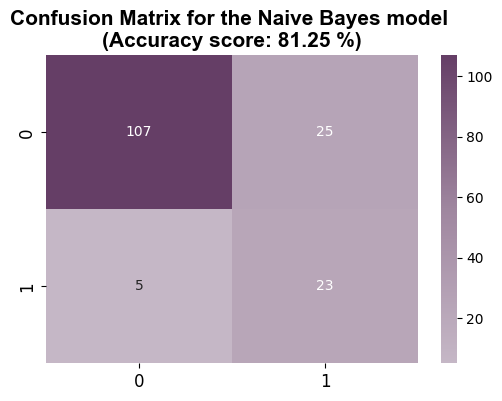

In [845]:
nb_ypred = classifier_nb.predict(X_test)

print("Accuracy Score (Naive Bayes model):", accuracy_score(y_test, nb_ypred)*100, "%") # Print the accuracy score for the predictions

cm_nb = confusion_matrix(y_test, nb_ypred)  # Generate the confusion matrix

from matplotlib.colors import LinearSegmentedColormap
colors = ["#c5b7c6", "#9f869f", "#653e66"]  # Light purple to dark purple
custom_cmap = LinearSegmentedColormap.from_list("purple_custom", colors) # Custom map for the confusion matrix

plt.figure(figsize=(6, 4))
sns.heatmap(cm_nb, annot = True, fmt='d', cmap = custom_cmap)   # Plot the confusion matrix into a heatmap
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title(f'Confusion Matrix for the Naive Bayes model \n(Accuracy score: {accuracy_score(y_test, nb_ypred)*100:.2f} %)', fontsize = 15, fontweight='bold', **csfont)
plt.tight_layout

## Decision Tree

In [847]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

Accuracy Score (Decision Tree model): 85.0 %


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

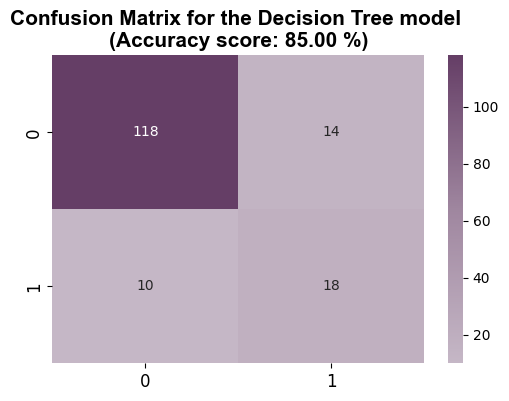

In [848]:
dt_ypred = classifier_dt.predict(X_test)

print("Accuracy Score (Decision Tree model):", accuracy_score(y_test, dt_ypred)*100, "%") # Print the accuracy score for the predictions

cm_dt = confusion_matrix(y_test, dt_ypred)  # Generate the confusion matrix

from matplotlib.colors import LinearSegmentedColormap
colors = ["#c5b7c6", "#9f869f", "#653e66"]  # Light purple to dark purple
custom_cmap = LinearSegmentedColormap.from_list("purple_custom", colors) # Custom map for the confusion matrix

plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot = True, fmt='d', cmap = custom_cmap)   # Plot the confusion matrix into a heatmap
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title(f'Confusion Matrix for the Decision Tree model \n(Accuracy score: {accuracy_score(y_test, dt_ypred)*100:.2f} %)', fontsize = 15, fontweight='bold', **csfont)
plt.tight_layout

## Random Forest

In [850]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

Accuracy Score (Random Forest model): 81.25 %


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

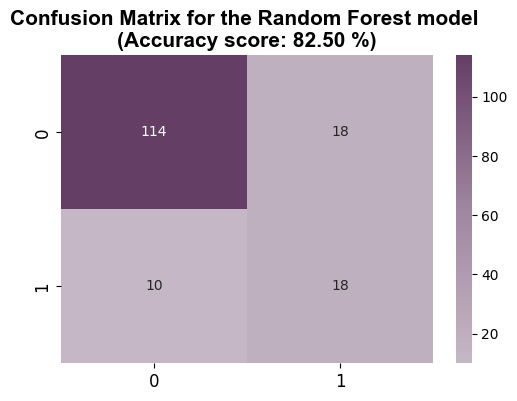

In [851]:
rf_ypred = classifier_rf.predict(X_test)

print("Accuracy Score (Random Forest model):", accuracy_score(y_test, nb_ypred)*100, "%") # Print the accuracy score for the predictions

cm_rf = confusion_matrix(y_test, rf_ypred)  # Generate the confusion matrix

from matplotlib.colors import LinearSegmentedColormap
colors = ["#c5b7c6", "#9f869f", "#653e66"]  # Light purple to dark purple
custom_cmap = LinearSegmentedColormap.from_list("purple_custom", colors) # Custom map for the confusion matrix

plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot = True, fmt='d', cmap = custom_cmap)   # Plot the confusion matrix into a heatmap
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title(f'Confusion Matrix for the Random Forest model \n(Accuracy score: {accuracy_score(y_test, rf_ypred)*100:.2f} %)', fontsize = 15, fontweight='bold', **csfont)
plt.tight_layout

## XGBoost

In [853]:
from xgboost import XGBClassifier
classifier_xg = XGBClassifier()
classifier_xg.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Accuracy Score (XGBoost model): 77.5 %


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

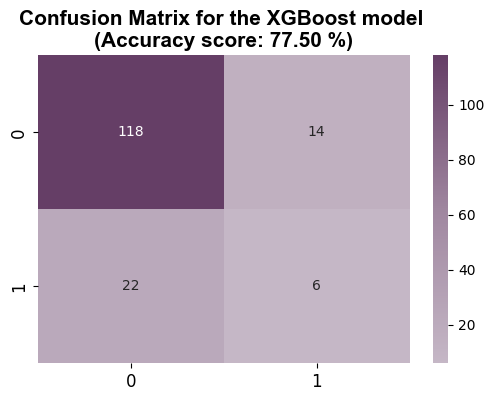

In [854]:
xg_ypred = classifier_xg.predict(X_test)

print("Accuracy Score (XGBoost model):", accuracy_score(y_test, xg_ypred)*100, "%") # Print the accuracy score for the predictions

cm_xg = confusion_matrix(y_test, xg_ypred)  # Generate the confusion matrix

from matplotlib.colors import LinearSegmentedColormap
colors = ["#c5b7c6", "#9f869f", "#653e66"]  # Light purple to dark purple
custom_cmap = LinearSegmentedColormap.from_list("purple_custom", colors) # Custom map for the confusion matrix

plt.figure(figsize=(6, 4))
sns.heatmap(cm_xg, annot = True, fmt='d', cmap = custom_cmap)   # Plot the confusion matrix into a heatmap
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title(f'Confusion Matrix for the XGBoost model \n(Accuracy score: {accuracy_score(y_test, xg_ypred)*100:.2f} %)', fontsize = 15, fontweight='bold', **csfont)
plt.tight_layout

## Artificial Neural Network

In [856]:
import tensorflow as tf
tf.__version__

'2.16.1'

In [857]:
ann = tf.keras.models.Sequential()


ann.add(tf.keras.layers.Dense(units = 12, activation = 'relu'))     # Add an input layer
ann.add(tf.keras.layers.Dense(units = 9, activation = 'relu'))      # Add a hidden layer
ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))   # Add the final output layer (sigmoid because the output is binary)
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])   # Compile the ANN

ann.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [858]:
ann.fit(X_train, y_train, batch_size = 1, epochs = 5)

Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6495 - loss: 0.6494
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8419 - loss: 0.3461
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8800 - loss: 0.2950
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8913 - loss: 0.2911
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9110 - loss: 0.2616


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Accuracy Score (ANN model): 77.5 %


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

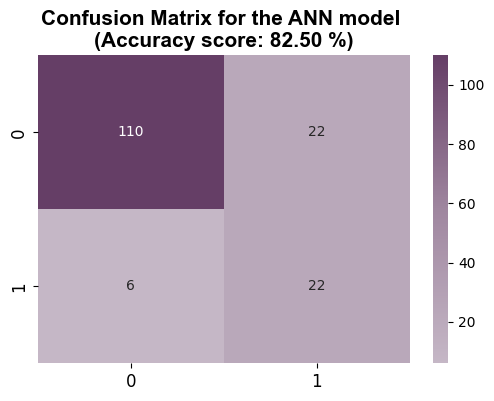

In [859]:
ann_ypred = ann.predict(X_test)
ann_ypred = (ann_ypred > 0.5)

print("Accuracy Score (ANN model):", accuracy_score(y_test, xg_ypred)*100, "%") # Print the accuracy score for the predictions

cm_ann = confusion_matrix(y_test, ann_ypred)  # Generate the confusion matrix

from matplotlib.colors import LinearSegmentedColormap
colors = ["#c5b7c6", "#9f869f", "#653e66"]  # Light purple to dark purple
custom_cmap = LinearSegmentedColormap.from_list("purple_custom", colors) # Custom map for the confusion matrix

plt.figure(figsize=(6, 4))
sns.heatmap(cm_ann, annot = True, fmt='d', cmap = custom_cmap)   # Plot the confusion matrix into a heatmap
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title(f'Confusion Matrix for the ANN model \n(Accuracy score: {accuracy_score(y_test, ann_ypred)*100:.2f} %)', fontsize = 15, fontweight='bold', **csfont)
plt.tight_layout

## Models performance

In [865]:
print('=='*15)
print('Model: Logistic Regression')
print(f'Accuracy score: {accuracy_score(y_test, lr_ypred)*100:.2f} %')

print('=='*15)
print('Model: K-Nearest Neighbors')
print(f'Accuracy score: {accuracy_score(y_test, kn_ypred)*100:.2f} %')

print('=='*15)
print('Model: Support Vector Machine')
print(f'Accuracy score: {accuracy_score(y_test, svc_ypred)*100:.2f} %')

print('=='*15)
print('Model: Naive Bayes')
print(f'Accuracy score: {accuracy_score(y_test, nb_ypred)*100:.2f} %')

print('=='*15)
print('Model: Decision Tree')
print(f'Accuracy score: {accuracy_score(y_test, dt_ypred)*100:.2f} %')

print('=='*15)
print('Model: Random Forest')
print(f'Accuracy score: {accuracy_score(y_test, rf_ypred)*100:.2f} %')

print('=='*15)
print('Model: XGBoost')
print(f'Accuracy score: {accuracy_score(y_test, xg_ypred)*100:.2f} %')

print('=='*15)
print('Model: Artificial Neural Network')
print(f'Accuracy score: {accuracy_score(y_test, ann_ypred)*100:.2f} %')

Model: Logistic Regression
Accuracy score: 80.62 %
Model: K-Nearest Neighbors
Accuracy score: 80.00 %
Model: Support Vector Machine
Accuracy score: 76.88 %
Model: Naive Bayes
Accuracy score: 81.25 %
Model: Decision Tree
Accuracy score: 85.00 %
Model: Random Forest
Accuracy score: 82.50 %
Model: XGBoost
Accuracy score: 77.50 %
Model: Artificial Neural Network
Accuracy score: 82.50 %
